# Import

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from utils import *
from mpl_toolkits.axes_grid1 import ImageGrid
from scene_text_binarization import get_binary_images

# BLOCK-1: Text Enchanment

In [5]:
print("Please Input File Name (Example: image_name)")     
FILE_NAME = input("FILE_NAME: ")
print("Please Input File Format (Example: .png)") 
FORMAT = input("FORMAT: ")

Please Input File Name (Example: image_name)
Please Input File Format (Example: .png)


In [6]:
text_enhancement(FILE_NAME, FORMAT)
FILE_NAME = 'output_images/' + FILE_NAME + '/' + FILE_NAME

Enhancing Contrast
Edge Detection
Locating the Text
Estimate Light Distribution
Balancing Light and Generating Result


# BLOCK-2: Text Binarization

In [7]:
file_suffixs = ['', '_Cei', '_CeiBin', '_EdgeBin', '_LDI', '_r', '_TLI', '_TLI_erosion']

file_paths = []
for suffix in file_suffixs:
    file_paths.append(FILE_NAME + suffix + FORMAT)

In [8]:
original_image = cv2.imread(file_paths[0])
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

In [9]:
frames = []
net = cv2.dnn.readNet("frozen_east_text_detection.pb")

for path in file_paths:
    if not os.path.exists(path):
        print('File not found: ', path)
        print('Please try again.')
        break
    
    frame = cv2.imread(path)
    frame = cv2.resize(frame, (320, 320))
    blob = cv2.dnn.blobFromImage(frame, 1.0, (320, 320), (123.68, 116.78, 103.94), True, False)

    output_layers = []
    output_layers.append("feature_fusion/Conv_7/Sigmoid")
    output_layers.append("feature_fusion/concat_3")

    net.setInput(blob)
    output = net.forward(output_layers)
    # Gray
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    scores = output[0]
    geometry = output[1]
    
    frames.append((frame, scores, geometry))

    print(f"File {path} has been processed.")

File output_images/I3/I3.jpg has been processed.
File output_images/I3/I3_Cei.jpg has been processed.
File output_images/I3/I3_CeiBin.jpg has been processed.
File output_images/I3/I3_EdgeBin.jpg has been processed.
File output_images/I3/I3_LDI.jpg has been processed.
File output_images/I3/I3_r.jpg has been processed.
File output_images/I3/I3_TLI.jpg has been processed.
File output_images/I3/I3_TLI_erosion.jpg has been processed.


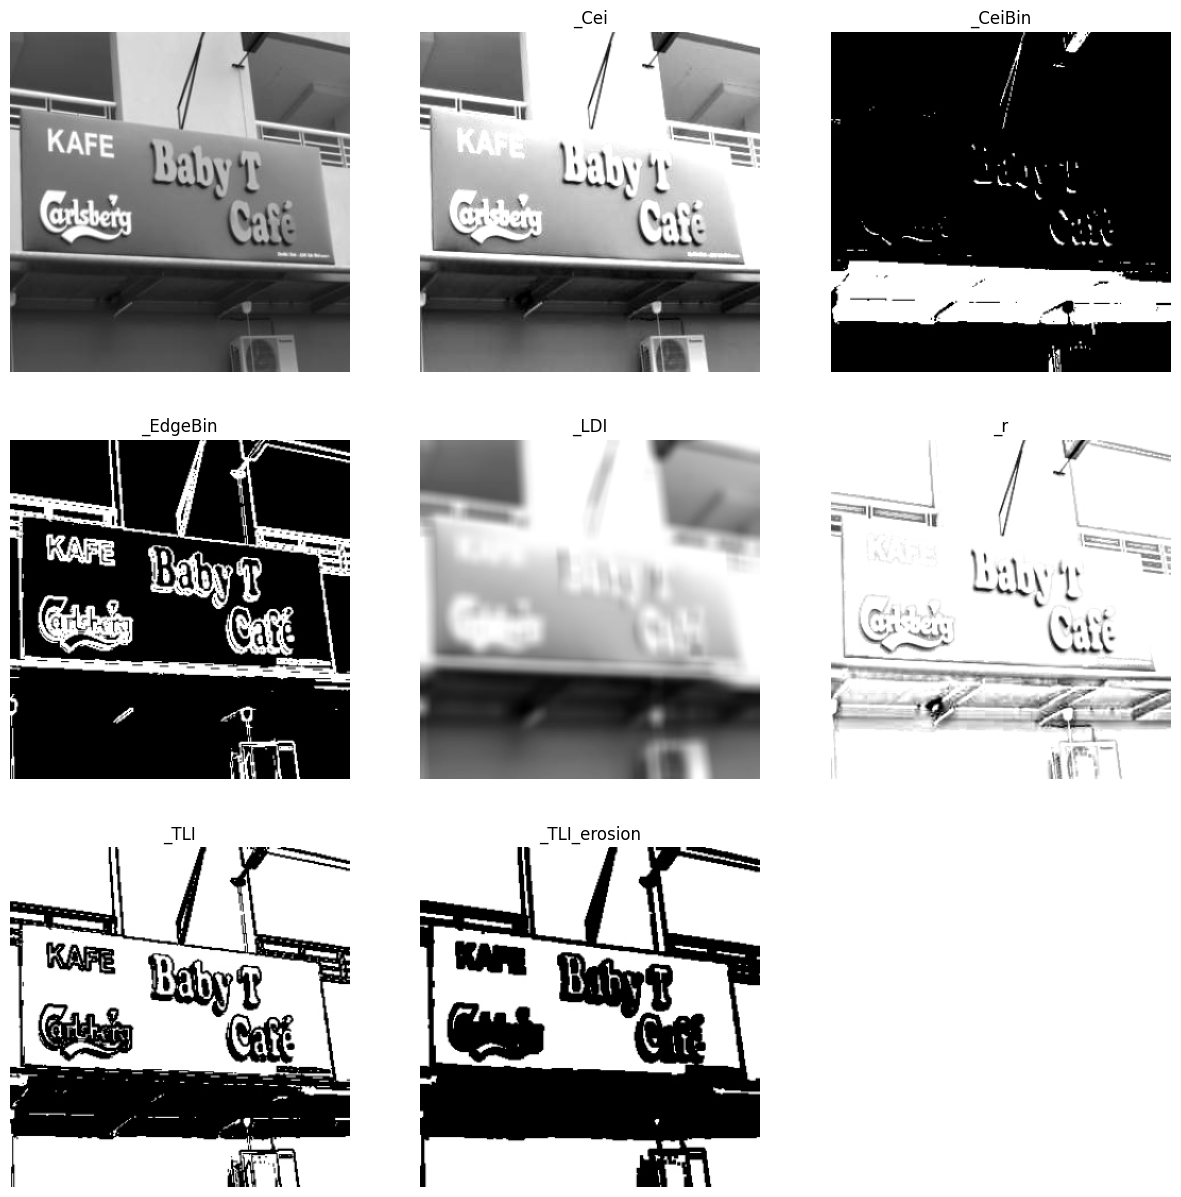

In [10]:
fig, axs = plt.subplots(3, 3 , figsize=(15, 15))
for i in range(8):
    axs[i//3, i%3].imshow(frames[i][0], cmap = 'gray')
    axs[i//3, i%3].axis('off')
    axs[i//3, i%3].set_title(file_suffixs[i])
axs[2][2].axis('off')
plt.show()

In [11]:
confThreshold = 0.5
nmsThreshold = 0.3

indices_arr = []
boxes_arr = []

for frame, scores, geometry in frames:
    [boxes, confidences] = decode_boxes(scores, geometry, confThreshold)
    indices = cv2.dnn.NMSBoxesRotated(boxes, confidences, confThreshold, nmsThreshold)
    indices_arr.append(indices)
    boxes_arr.append(boxes)

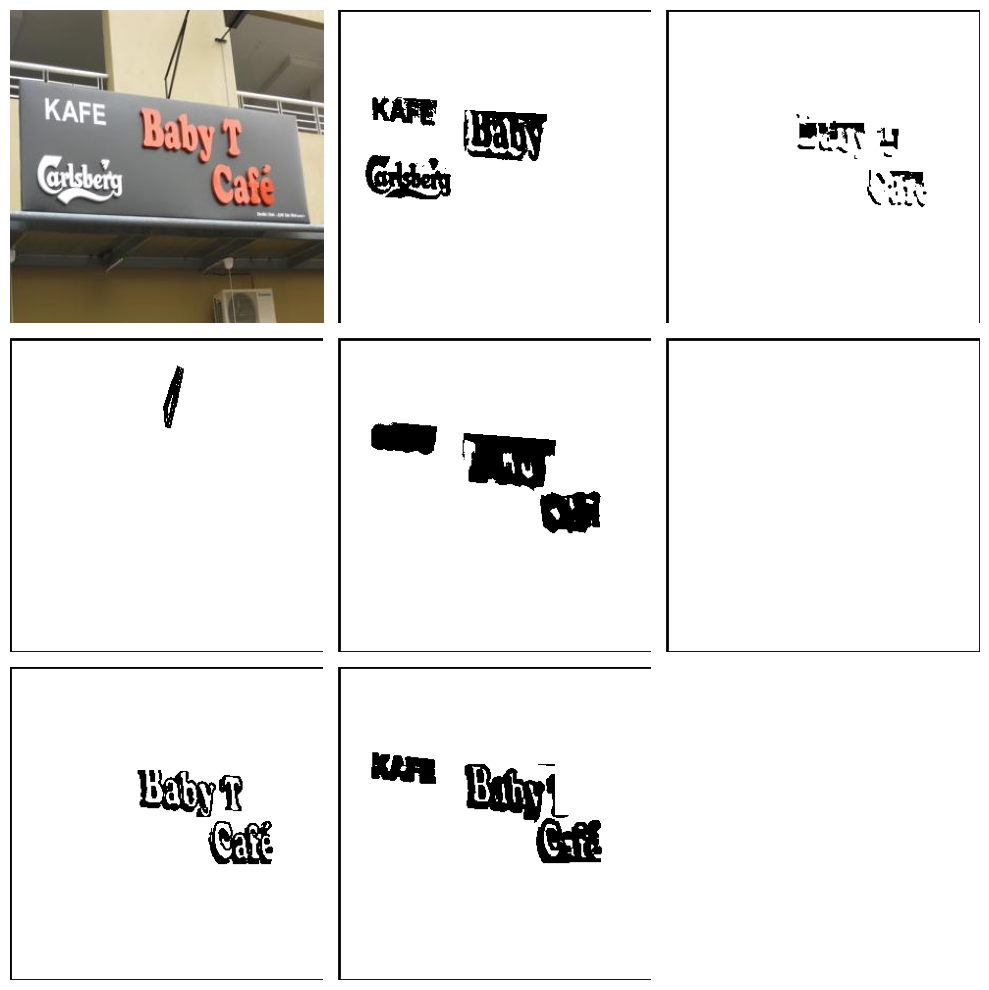

In [12]:
binarized_images = []
fig, axs = plt.subplots(3,3,figsize = (10, 10))

axs[0][0].imshow(original_image, cmap='gray')
axs[0][0].axis('off')
for i, frame in enumerate(frames[1:]):

    frame_, _, _ = frame
    binarize_image = mask_image(frame_, boxes_arr[i], indices_arr[i])
    binarized_images.append(binarize_image)
    i += 1
    axs[i//3][i%3].imshow(binarize_image, cmap='gray', vmin=0, vmax=1)
    axs[i//3][i%3].axis('off')
    rect = patches.Rectangle((0, 0), 320, 320, linewidth=2, edgecolor='black', facecolor='none')
    axs[i//3][i%3].add_patch(rect)
axs[2][2].axis('off')

plt.tight_layout()
plt.show()

# Comparison

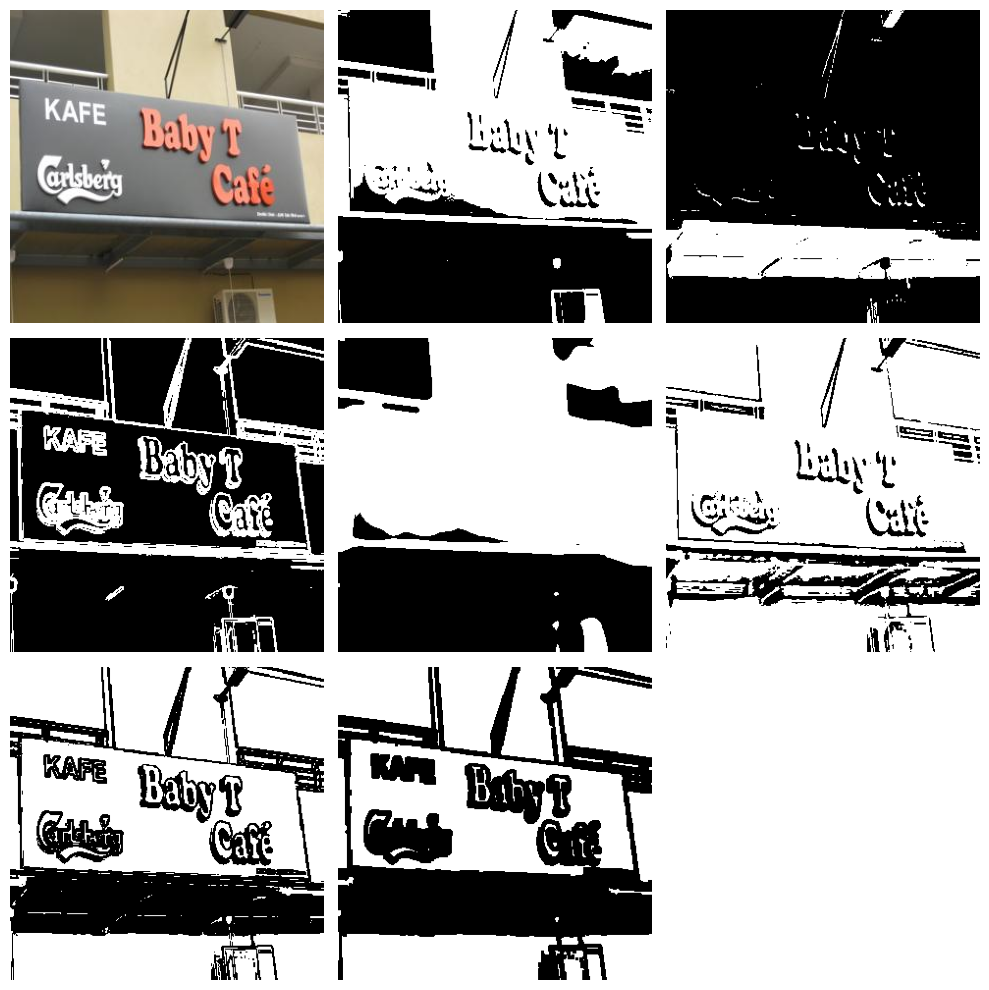

In [13]:
# Comparison with otsu thresholding
otsu_images = []
fig, axs = plt.subplots(3,3,figsize = (10, 10))

axs[0][0].imshow(original_image, cmap='gray')
axs[0][0].axis('off')

for i, frame in enumerate(frames[1:]):
    frame_, _, _ = frame
    otsu_image = otsu_thresholding(frame_)
    otsu_images.append(otsu_image)
    i += 1
    axs[i//3][i%3].imshow(otsu_image, cmap='gray')
    axs[i//3][i%3].axis('off')
axs[2][2].axis('off')

plt.tight_layout()
plt.show()

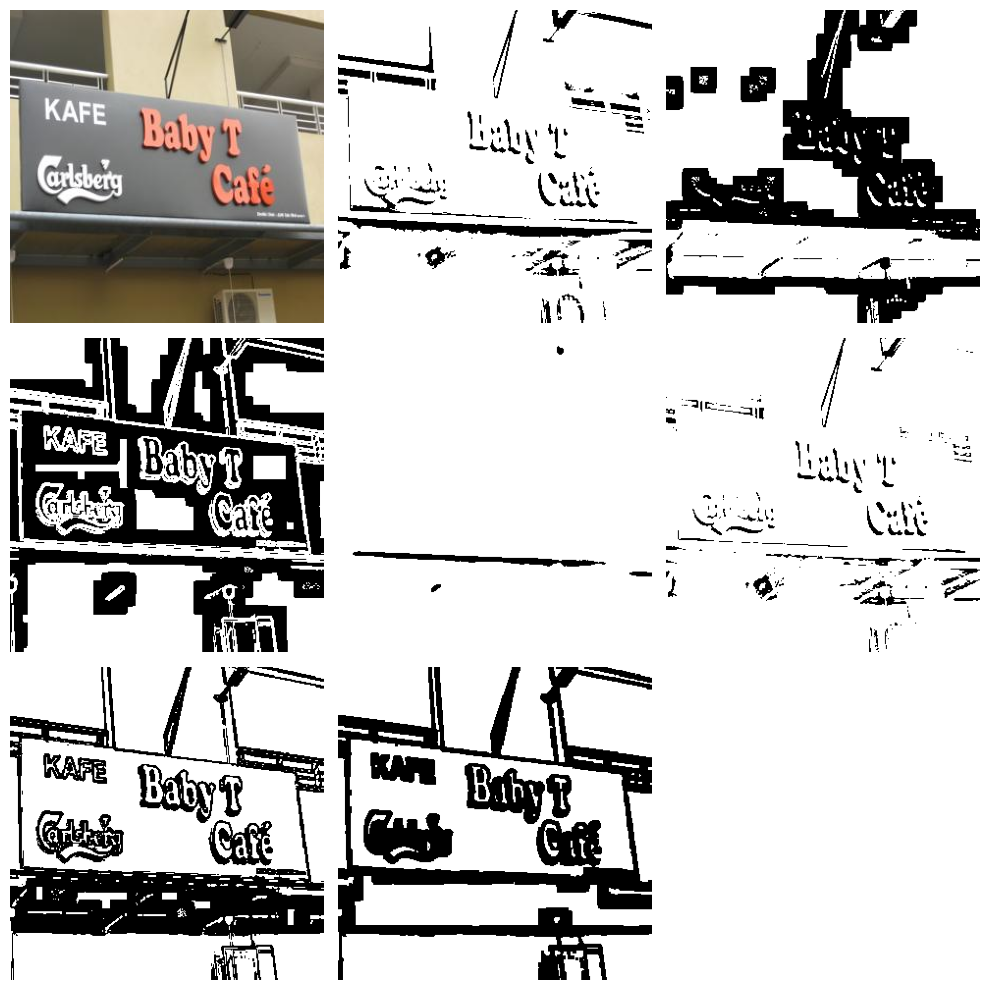

In [14]:
sauvola_images = []
fig, axs = plt.subplots(3,3,figsize = (10, 10))

axs[0][0].imshow(original_image, cmap='gray')
axs[0][0].axis('off')

for i, frame in enumerate(frames[1:]):
    frame_, _, _ = frame
    sauvola_image = sauvola_threshold(frame_, 19, 0.5)
    sauvola_images.append(sauvola_image)
    i += 1
    axs[i//3][i%3].imshow(sauvola_image, cmap='gray')
    axs[i//3][i%3].axis('off')
axs[2][2].axis('off')

plt.tight_layout()
plt.show()

I3 .jpg
Enhancing Contrast
Edge Detection
Locating the Text
Estimate Light Distribution
Balancing Light and Generating Result
Binarization Started
File output_images/I3/I3.jpg has been processed.
File output_images/I3/I3_Cei.jpg has been processed.
File output_images/I3/I3_CeiBin.jpg has been processed.
File output_images/I3/I3_EdgeBin.jpg has been processed.
File output_images/I3/I3_LDI.jpg has been processed.
File output_images/I3/I3_r.jpg has been processed.
File output_images/I3/I3_TLI.jpg has been processed.
File output_images/I3/I3_TLI_erosion.jpg has been processed.
Boxes and indices have been detected.
File output_images/I3/I3_Cei_binarized.jpg has been saved.
File output_images/I3/I3_CeiBin_binarized.jpg has been saved.
File output_images/I3/I3_EdgeBin_binarized.jpg has been saved.
File output_images/I3/I3_LDI_binarized.jpg has been saved.
File output_images/I3/I3_r_binarized.jpg has been saved.
File output_images/I3/I3_TLI_binarized.jpg has been saved.
File output_images/I3/I

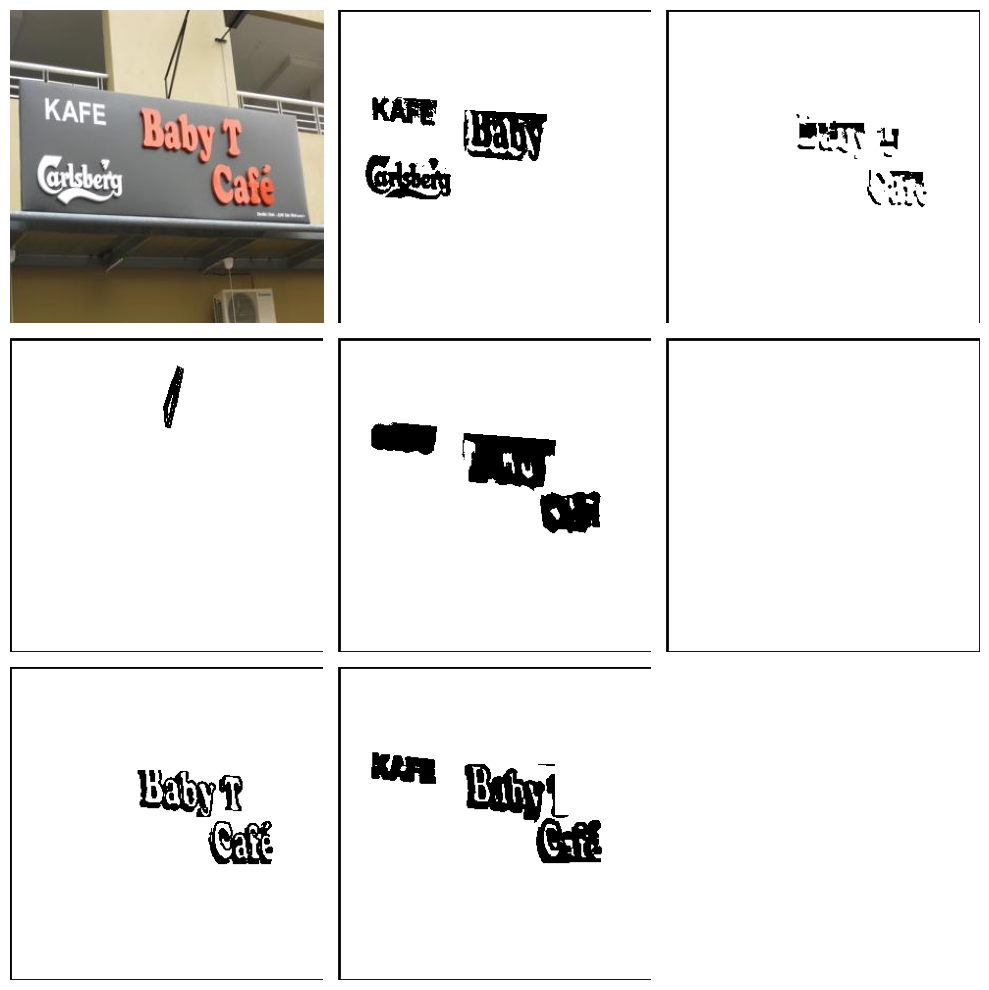

In [7]:
image_files = ['I3.jpg']
b_images = get_binary_images(image_files)